In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/alexandersimakov/Documents/NeueFische/August/ml-project/ml-project/data/data/Final_Data 3.csv')

# Split the data
test_data = df[df['state'] == 0]
train_data = df[df['state'] != 0]

In [2]:
df.head()

,created_at,goal,state,country_new,category_num,disable_communication_True,is_starrable_True,staff_pick_True
0,2018-11-05 23:06:45,28000.0,0,0,0,False,False,False
1,2017-08-02 14:28:13,1000.0,2,0,1,False,False,False
2,2012-09-30 06:45:33,15000.0,2,0,2,False,False,False
3,2017-01-07 09:11:11,10000.0,1,1,1,False,False,False
4,2012-12-06 18:04:31,2800.0,2,0,3,False,False,False


In [3]:

df['created_at'] = pd.to_datetime(df['created_at'])

df['created_at'] = df['created_at'].dt.month

In [4]:
#excluding all "live" projects

df_filtered = df[df['state'] != 0]

In [5]:
df = df_filtered

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 201911 entries, 1 to 209221
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_at                  201911 non-null  int32  
 1   goal                        201911 non-null  float64
 2   state                       201911 non-null  int64  
 3   country_new                 201911 non-null  int64  
 4   category_num                201911 non-null  int64  
 5   disable_communication_True  201911 non-null  bool   
 6   is_starrable_True           201911 non-null  bool   
 7   staff_pick_True             201911 non-null  bool   
dtypes: bool(3), float64(1), int32(1), int64(3)
memory usage: 9.1 MB


Best parameters found:  {'C': 100}
Best cross-validation score: 0.64
              precision    recall  f1-score   support

           1       0.68      0.29      0.40     25293
           2       0.64      0.90      0.75     35281

    accuracy                           0.65     60574
   macro avg       0.66      0.59      0.58     60574
weighted avg       0.66      0.65      0.60     60574

Confusion Matrix:
[[ 7227 18066]
 [ 3406 31875]]


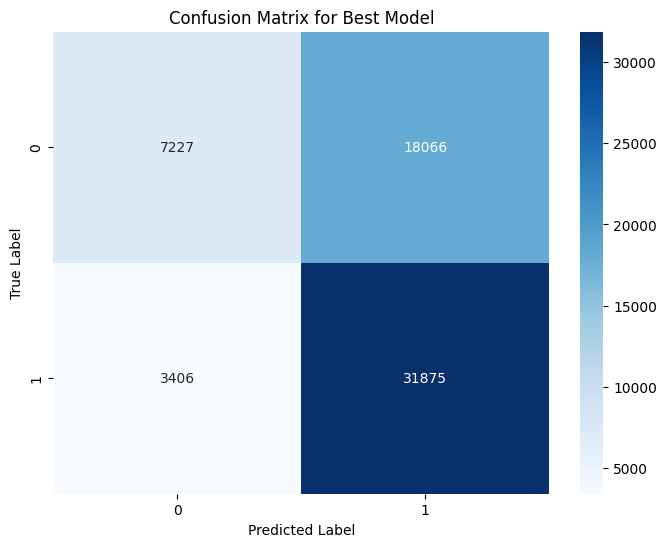

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.29      0.40     25293
           2       0.64      0.90      0.75     35281

    accuracy                           0.65     60574
   macro avg       0.66      0.59      0.58     60574
weighted avg       0.66      0.65      0.60     60574



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Target and features
y = df['state']
X = df.drop('state', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameter grid
model = LogisticRegression(solver='lbfgs')  # Choose appropriate solver
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[ 7227 18066]
 [ 3406 31875]]


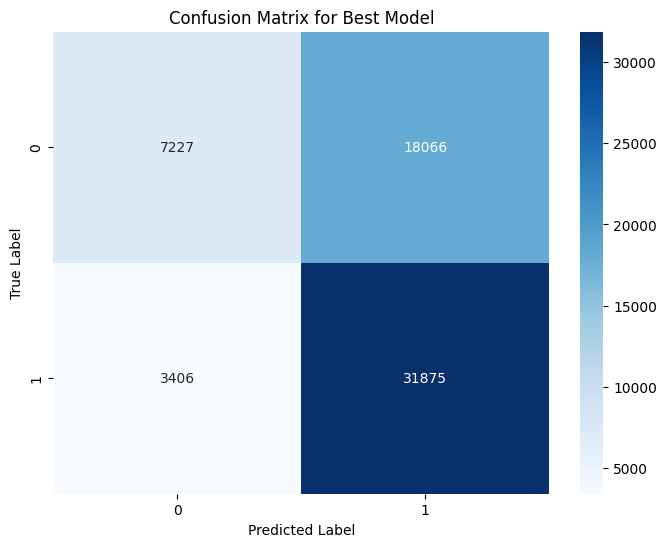

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.29      0.40     25293
           2       0.64      0.90      0.75     35281

    accuracy                           0.65     60574
   macro avg       0.66      0.59      0.58     60574
weighted avg       0.66      0.65      0.60     60574



In [15]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
df_cm = pd.DataFrame(cm, index=[i for i in range(cm.shape[0])], columns=[i for i in range(cm.shape[1])])
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best Model')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
